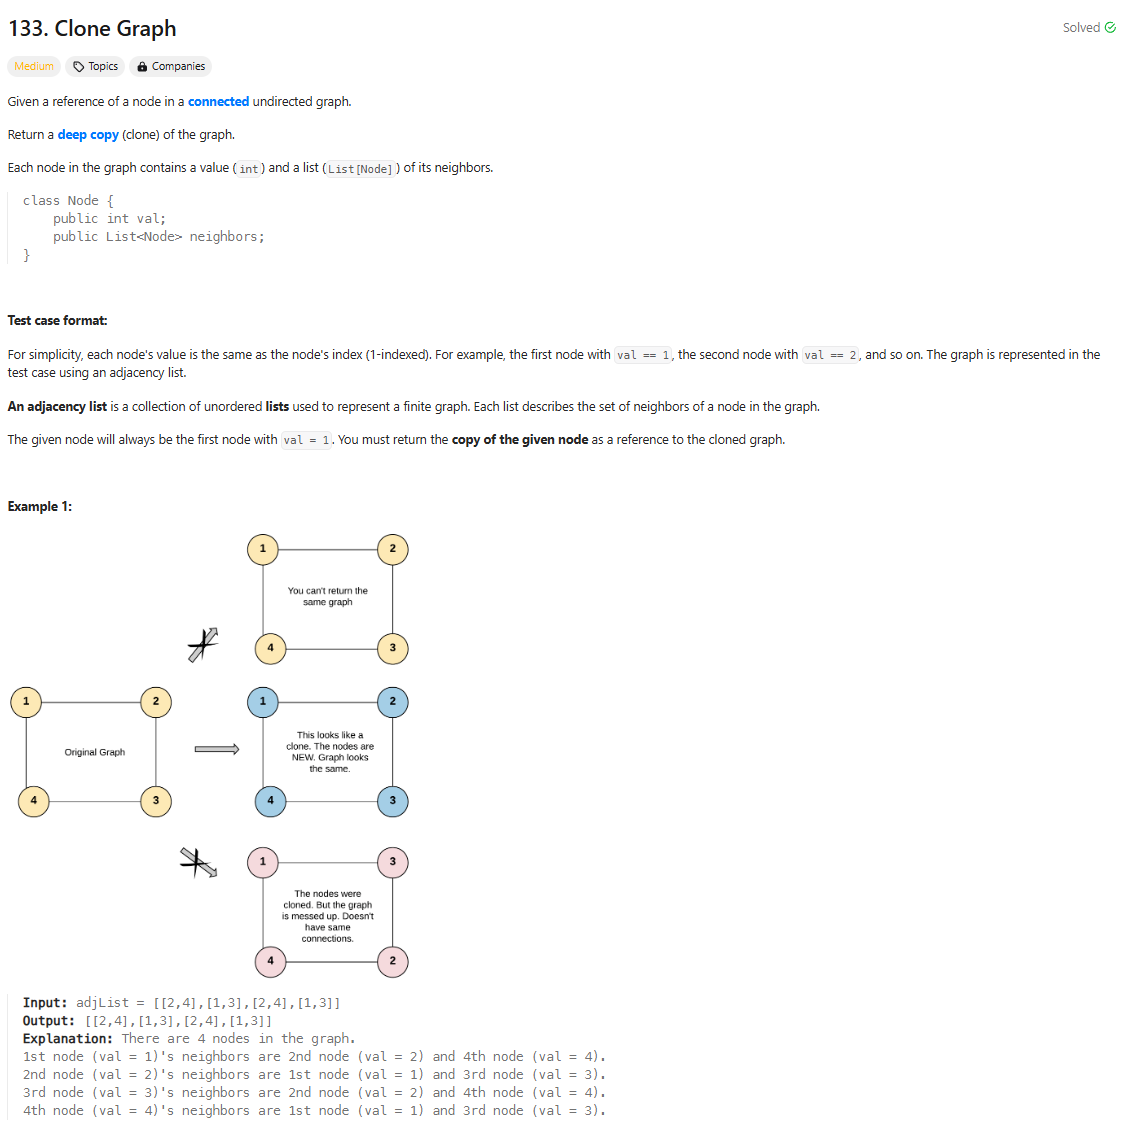

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""

In [ ]:
# Solution 1 (DFS)
# Time: O(E) where E is the number of edges
# Memory: O(N) -> Worse case: a line of nodes one connected to the next. Then recursive size becomes N + Seen. 

from typing import Optional
class Solution:
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:
        seen = {}
        if not node:
            return None
        
        def dfs(node):
            if node.val in seen:
                return seen[node.val]
            
            copyNode = Node(val=node.val)
            seen[node.val] = copyNode
            for nn in node.neighbors:
                copyNode.neighbors.append(dfs(nn))
            return copyNode

        return dfs(node)

In [ ]:
# Solution 2 (BFS)
# Time: O(E) where E is the number of edges
# Memory: O(N) ->  Worse Case: one node at the center and all other nodes are connected to it. Then queue size becomes N + Seen.

class Solution:
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:
        if not node:
            return None
        copy_root = copy_node = Node(node.val, [])
        seen_nodes = {node:copy_node}
        bfs = deque([(copy_node, node)])
        while bfs:
            for _ in range(len(bfs)):
                temp = bfs.popleft()
                copy_node, node = temp
                for child in node.neighbors:
                    if child not in seen_nodes:
                        copy_child = Node(child.val, [])
                        seen_nodes[child] = copy_child
                        bfs.append((copy_child, child))
                    copy_node.neighbors.append(seen_nodes[child]) 
        return copy_root